In [1]:
%matplotlib inline
from matplotlib import rcParams

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Introduction to clustering

Clustering is a machine learning technique used to group unlabeled datapoints in groups called *clusters*. The grouping is done such that similar items are together in the same cluster and items in different clusters are dissimilar from each-other. Typically similarity is defined using a distance measure (Euclidean, cosine, etc). Common practical applications for clustering include: market segmentation, social network analysis, search result grouping, anomaly detection etc.


Two clustering methods will be explored in this notebook:

- K-means.
- Hierarchical clustering.

More methods can be found [here](https://scikit-learn.org/stable/modules/classes.html?highlight=cluster#module-sklearn.cluster).

#### To begin with
Get familiar with how clustering works by watching the videos in Resources A and reading the article in Resources B.


#### Resources: 

* A. Introduction to clustering:
    * https://www.youtube.com/watch?v=4cxVDUybHrI
    
    
* B. A Comprehensive Survey of Clustering Algorithms
    * https://link.springer.com/article/10.1007/s40745-015-0040-1 (Read everything until the section Traditional Clustering Algorithms. From the section Traditional Clustering Algorithms, read the first 2 subsections. You can skip Modern Traditional Clustering Algorithms.)



* C. K-means clustering:
     * https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
     
     * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)
     
     
* D. Hierarchical clustering:
    * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
    * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
    * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering 

### Subject comprehension 

To check your understanding, before moving further, answer the questions in your own words in the space below.

1. What is clustering?


Resposta : *Clustering, ou agrupamento, consiste na implementação de técnicas computacionais para separar um conjunto de dados em diferentes grupos com base em suas semelhanças. Diferentemente de algoritmos de classificação e regressão, o Agrupamento faz parte do universo da Aprendizagem Não Supervisionada, na qual os algoritmos devem entender as relações entre dados sem estarem rotulados a nenhuma categoria prévia.*

Os algoritmos de clustering podem ser agrupados em quatro categorias: Clusterização Baseada em Centróides, Clusterização baseada em Densidades, Clusterização, Clutserização baseada em Distribuições e Clusterização Hierárquica.

Os principais algoritmos de clustering:

    K-Means
    Mini Batch K-Means
    BDScan
    Affinity Propagation
    BIRCH
    Agglomerative Clustering

https://medium.com/turing-talks/clustering-conceitos-b%C3%A1sicos-principais-algoritmos-e-aplica%C3%A7%C3%A3o-ace572a062a9
______________________________

2. What are the main steps in the standard process of clustering?

1. Definir o Problema e Objetivos:
    Articular claramente o problema que você está tentando resolver por meio do clustering.
    Definir os objetivos e metas da análise de clustering.

2. Coleta de Dados:
    Reunir dados relevantes adequados para o clustering.
    Garantir que os dados sejam representativos do problema que você está abordando.
3. Limpeza e Pré-processamento de Dados:
    Lidar com valores ausentes, outliers e outros problemas de qualidade dos dados.
    Normalizar ou padronizar os dados, se necessário, para garantir que todas as características contribuam igualmente.
4. Seleção de Características:
    Escolher as características relevantes que serão usadas para o clustering.
    Remover características irrelevantes ou redundantes que podem não contribuir para o processo de clustering.
5. Escolha de um Algoritmo de Clustering:
    Selecionar um algoritmo de clustering apropriado com base na natureza dos seus dados e nos objetivos da sua análise.
    Algoritmos comuns de clustering incluem k-means, hierarchical clustering, DBSCAN e Gaussian Mixture Models (GMM).
6. Determinar o Número de Clusters:
    Para algoritmos como k-means, especificar o número de clusters (k) antecipadamente.
    Utilizar técnicas como o método do cotovelo ou análise de silhueta para determinar um número ótimo de clusters.
7. Transformação de Características (Opcional):
    Aplicar técnicas de redução de dimensionalidade se o conjunto de dados for de alta dimensionalidade.
    A Análise de Componentes Principais (PCA) é um método comum para a transformação de características.
8. Atribuição de Clusters:
    Aplicar o algoritmo de clustering escolhido ao conjunto de dados para atribuir cada ponto de dados a um cluster.
    O algoritmo agrupará pontos de dados que são semelhantes entre si.
9. Avaliar os Clusters:
    Avaliar a qualidade dos clusters usando métricas apropriadas.
    Métricas comuns incluem pontuação de silhueta, índice de Davies-Bouldin e distância intra-cluster.
10. Interpretar Resultados:
    Examinar as características de cada cluster para entender os padrões e relacionamentos dentro dos dados.
    Interpretar os resultados no contexto do problema que está sendo resolvido.
11. Iterar e Refinar:
    Dependendo dos resultados e do feedback, iterar e refinar a análise.
    Ajustar parâmetros, experimentar algoritmos diferentes ou revisitar etapas de pré-processamento de dados conforme necessário.
12. Implantação (se aplicável):
    Se o clustering fizer parte de um sistema ou aplicativo maior, implantar o modelo de clustering para uso no mundo real.
    __________________________________________

3. What is the Silhouette coefficient?


Resposta: *O coeficiente de Silhouette calcula um índice para cada amostra que indica o quanto aquela amostra deve pertencer ao cluster. O seu cálculo é dado com base em dois scores:*

    a: A distância média entre uma amostra e todos os outros pontos no mesmo cluster.

    b: O mínimo dentre as médias das distâncias entre uma amostra e todos os pontos de um outro cluster.


*O resultado é limitado entre -1, para amostras que possivelmente estão mal classificadas, e +1 para amostras que estão bem classificadas. Pontuações em torno de zero indicam que o cluster em que a amostra analisada pertence é composto de um único ponto.*

https://medium.com/@gilneyjnr/qualidade-de-agrupamentos-ci%C3%AAncia-de-dados-4b1176bef5e5

4. What are the two types of evaluation for a clustering algorithm and what is the difference between them?

Resposta :

 *1. Internal measures do not require any ground truth to assess the quality of clusters. They are based solely on the data and the clustering results.*

*2. External measures compare the clustering results to ground truth labels.*

__________________

*Answer here*

### Data acquisition

Load the data about bank clients from the *bank-full.csv* file into a pandas dataframe. Make the necessary imports.

In [3]:
df = pd.read_csv('../data/bank-full.csv', sep=';')

Print a summary of the data as well as the first 5 rows.

In [4]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Preprocessing

To facilitate the computation of distances, keep only the numerical features in the dataset.

- Remove all non-numerical features, as well as the features related to the date.


In [6]:
import numpy as np
from sklearn.compose import make_column_selector

numerical_features = make_column_selector(dtype_include=np.number)
numerical_columns = numerical_features(df)
numerical_df = df[numerical_columns]

numerical_df.sample(5)

,age,balance,day,duration,campaign,pdays,previous
17897,44,0,30,684,2,-1,0
1078,56,-24,7,305,3,-1,0
22054,33,20794,20,226,5,-1,0
26793,54,641,20,399,2,-1,0
43609,60,5,4,494,1,95,2


- Make sure there are no missing values - if they exist, remove them.


In [7]:
numerical_df.isnull().sum()

age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

- Normalize the new dataset (transform the data for multiple features to the same scale).


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
df_norm = scaler.fit_transform(numerical_df)
print(type(df_norm))
df_norm

<class 'pandas.core.frame.DataFrame'>


,age,balance,day,duration,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940


- Save the result in a dataframe *df_norm*

In [9]:
numerical_df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

Plot histograms of features

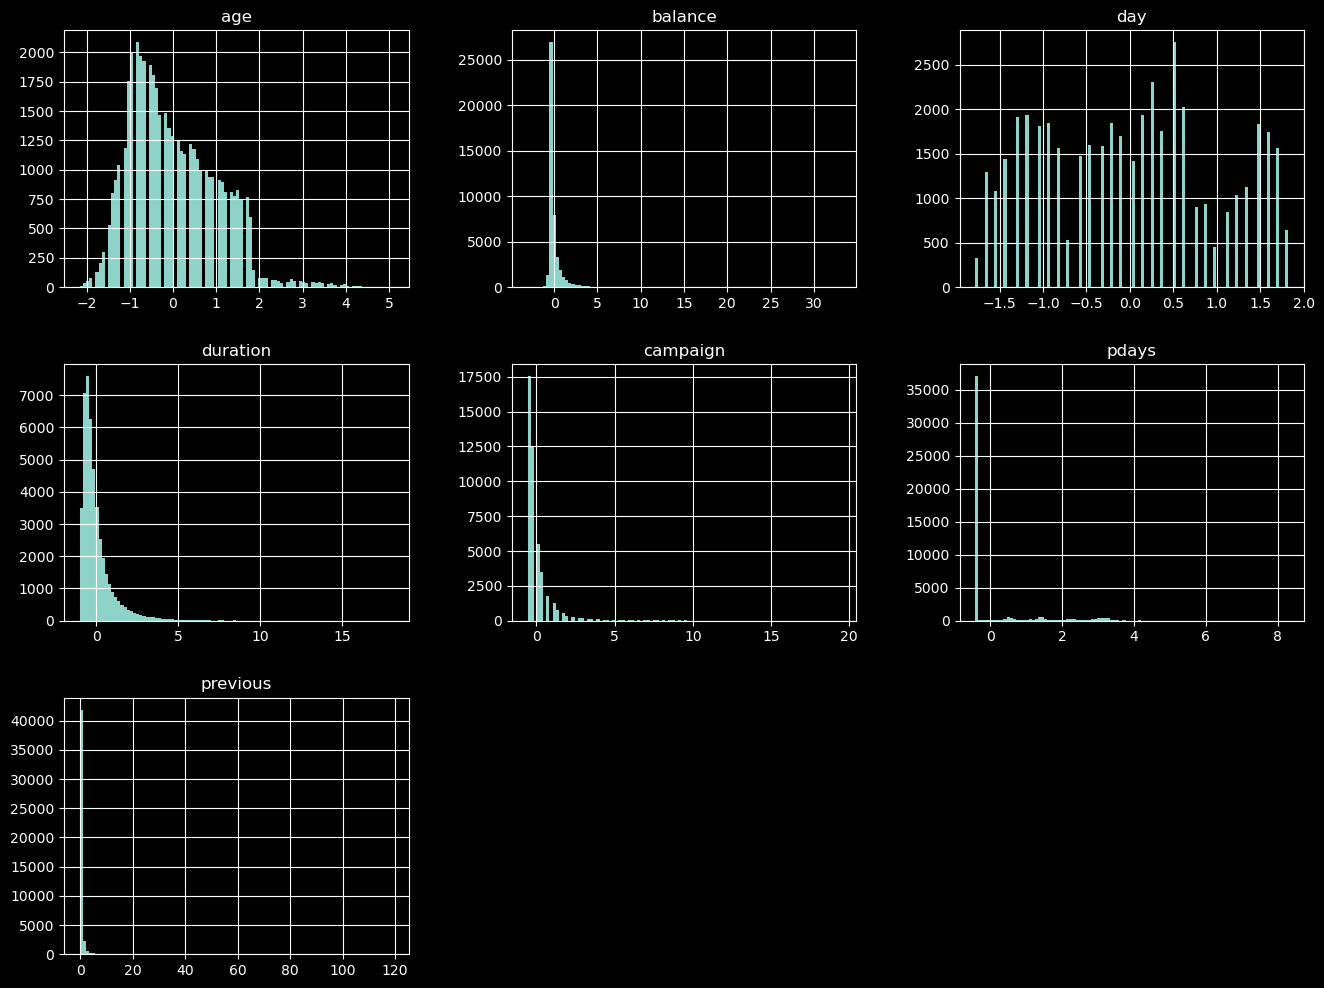

In [10]:
rcParams['figure.figsize'] = 16,12
df_norm.hist(bins=100)
plt.title('histogram_norm')
plt.show()

## KMeans


Let's warm up with the well known algorithm named KMeans!

Centroid-based clustering organizes the data into non-hierarchical clusters, contrarily to hierarchical clustering. KMeans is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. 


To better understand the way the algorithm works, read the documents and watch the video in Resources C:
* https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
* https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)


Then answer the below questions (in your own words):
1. What is a centroid?


Resposta: *O centro de um cluster. A média aritmética de todos os pontos pertencentes ao cluster.*
____________________________

2. How can you compute a centroid?

Resposta: 

*Step 0: Define the K number of clusters.*

*Step 1: Partition the items into K initial clusters.*

*Step 2: Scan through the list of n items, assigning each item to the cluster whose centroid (mean) is closest. Each time an item is reassigned, we recalculate the cluster mean or centroid for the cluster receiving that item and the cluster losing that item.*

*Step 3: Repeat Step 2 over and over again until no more reassignments are made.*
_________________________________


3. Are you supposed to know in advance the number of clusters in order to use the KMeans algorithm?


Resposta: *Yes. By performing some methods for selecting optimal number of clusters. Main models available are:*

    Gap Statistic
    Elbow Method
    Silhouette Coefficient
    Calinski-Harabasz Index
    Davies-Bouldin Index
    Dendrogram
    Bayesian information criterion (BIC)




#### Make the necessary imports from scikit learn in order to perform KMeans clustering

#### Exploring KMeans with sklearn

The goal of this step is to become familiar with the sklearn clustering package and the silhouette analysis concepts.

Start by peforming a clustering of the data in *df_norm* into 5 clusters.

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state = 0, n_init='auto')
kmeans.fit(df_norm)

KMeans(n_clusters=5, n_init='auto', random_state=0)

Print the centroids obtained

In [14]:
centroids_df_norm = kmeans.cluster_centers_
centroids_df_norm

array([[-5.56867603e-03, -1.43536374e-01, -1.20453181e-03,
        -2.67572868e-01, -1.45499452e-01, -3.78077219e-01,
        -2.23508584e-01],
       [ 2.28381979e-03, -4.59583286e-02,  1.69257895e-02,
         2.32291018e+00, -1.31847865e-01, -2.77735808e-01,
        -1.63253221e-01],
       [-2.31405178e-02, -1.44072930e-01,  7.77104003e-01,
        -4.29375245e-01,  3.65691299e+00, -4.00373241e-01,
        -2.40722954e-01],
       [ 3.29379331e-01,  4.16235478e+00,  1.97235142e-02,
        -6.63214293e-02, -1.11543495e-01, -1.26704240e-01,
        -5.18535768e-02],
       [-3.37592210e-02, -6.34985278e-02, -2.28107440e-01,
        -9.34047997e-02, -2.13671526e-01,  2.15876584e+00,
         1.27211357e+00]])

Print the cluster labels assigned to each point

In [15]:
labels_df_norm = kmeans.labels_
len(np.unique(labels_df_norm))

5

In [16]:
df_norm['Cluster'] = labels_df_norm

In [17]:
df_norm['Cluster'].value_counts()

Cluster
0    31391
4     6457
1     4250
2     1819
3     1294
Name: count, dtype: int64

### **Visualization**

Let's try to visualize the created clusters. As it is easier to visualize 2-dimensional data, first run PCA on the data. Then create a scatterplot to visualize the clustered points, each coloured differently depending on the cluster they belong to.

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_norm)

PCA(n_components=2)

In [26]:
df_pca = pca.fit_transform(df_norm)

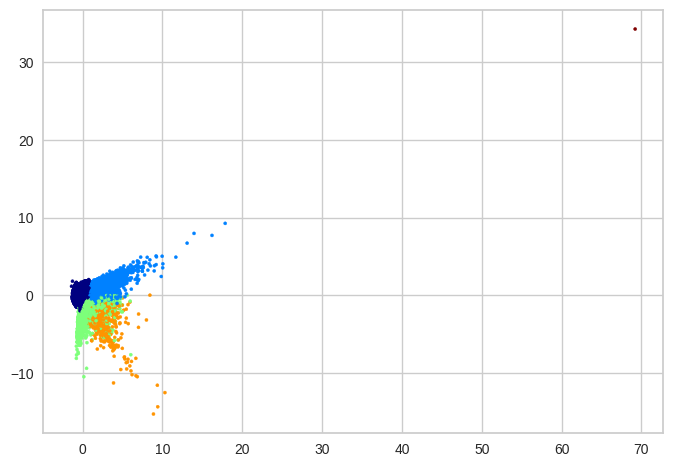

In [ ]:
plt.scatter(x=df_pca[:, 0], y=df_pca[:, 1], s=5, c=kmeans.labels_, cmap='jet')

In [34]:
scores_pca = pca.transform(df_norm)
scores_pca

array([[-0.8573166 , -1.08529145],
       [-0.95861394, -1.14156391],
       [-0.97564382, -1.13062131],
       ...,
       [ 1.53599727, -0.19871878],
       [-0.92016243,  0.13164183],
       [ 4.86268613, -0.31630495]])

In [35]:
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

/home/marcos.centurion@Digital-Grenoble.local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

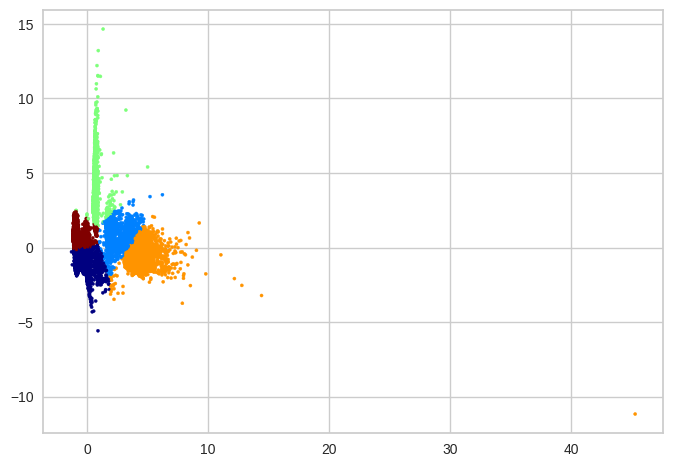

In [39]:
plt.scatter(x=df_pca[:, 0], y=df_pca[:, 1], s=5, c=kmeans_pca.labels_, cmap='jet')

### Evaluation

**Inertia** can be a measure of how internally coherent clusters are. It represents the within-cluster sum-of-squares.

Read more about it here:
https://scikit-learn.org/stable/modules/clustering.html#k-means 

Print the inertia obtained after the clustering.

**The silhouette score**

Make the necessary imports from scikit learn and compute the silhoutte score.

Read what this score represents and how it is computed here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html and here https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [41]:
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(df_norm, kmeans_pca.labels_, metric='euclidean')
print(f'The silhouette score is:', silhouette_score)

 The silhouette score is: 0.18248896124061798


You can read more about other clustering evaluation methods here: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

### Finding the optimal number of clusters

In the following article you will find several [methods](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for determining the number of clusters.

We will first use the silhouette score for obtaining the optimal number of clusters. Optional: another method you can try is the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) ).


**Use the silhouette analysis to find an optimal number of clusters for the bank clients data.** <u><i>Hint:</u></i> Feel free to use the `n_jobs` hyperparameter to speed up your computation.

An example of silhouette analysis is presented here: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Plot the silhouette scores for 20 different numbers of clusters of your choice.

/home/marcos.centurion@Digital-Grenoble.local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcos.centurion@Digital-Grenoble.local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcos.centurion@Digital-Grenoble.local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcos.centurion@Digital-Grenoble.local/ana

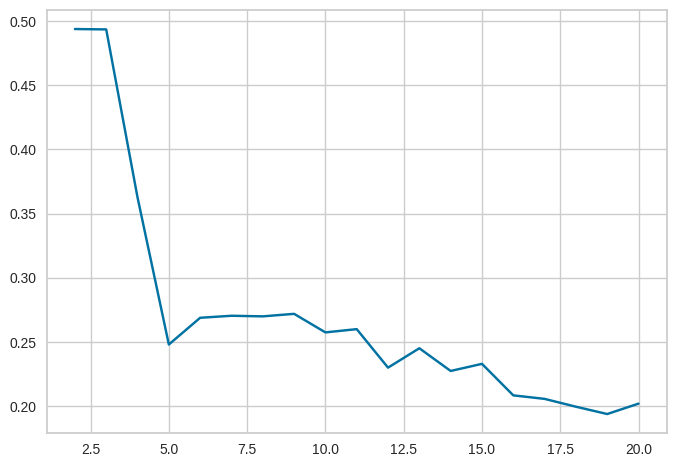

In [44]:
from sklearn.metrics import silhouette_score

df_temp = df_norm.sample(frac=0.2)

silhouettes = []
kmin = 2
kmax = 20

for k in range(kmin, kmax+1):
  
    kmeans = KMeans(n_clusters = k).fit(df_temp)
    labels = kmeans.labels_

    silhouettes.append(silhouette_score(df_temp, labels, metric = 'euclidean'))

plt.plot(range(kmin,kmax+1),silhouettes)
plt.show()

In [11]:
# Elbow Method for (optimal) K means
!pip install yellowbrick

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

/home/marcos.centurion@Digital-Grenoble.local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcos.centurion@Digital-Grenoble.local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcos.centurion@Digital-Grenoble.local/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcos.centurion@Digital-Grenoble.local/ana

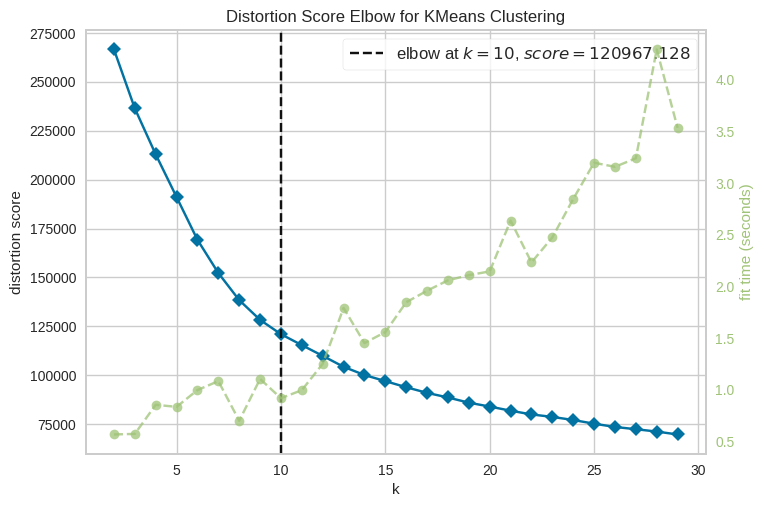

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(df_norm)
visualizer.show() 

What is the optimal number of clusters that you obtained?

*Answer here*

## Hierarchical Clustering

Let's try to apply now a different method on the same data. You can find more explanations on hierarchical clustering in the links in section Resources D. Hierarhchical clustering:
 * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
 * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
 * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

Make the necessary imports from scikit learn to perform hierarchical clustering. 

Start by plotting the dendrogram and deciding the number of clusters. Then apply hierarchical clustering.

You might find this useful: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html for creating the dendrogram.

In [ ]:
# code here

How many clusters did you find?

*Answer here*

Compare the kmeans labels with the labels obtained by the hierarchical clustering.

In [ ]:
# code here

### Application: clustering images

Theses techniques can be use to reduce the number of colours in a picture

- find a picture you want to reduce the number of colours.
- use `skimages` and `sklearn` to reduce the number of colours in this picture
- from your picture create two pictures with 16 colours what do you notice?

In [ ]:
# install skimage

#Code here

Now let's try to apply KMeans clustering on the simple digits data that can be loaded from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

The goal is to use KMeans to try to identify similar digits without using the original label information.

Start by loading the digits and then finding the KMeans clusters. The digits data consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image.

In [ ]:
# code here

The cluster centroids themselves are 64-dimensional points, and can thus be interpreted as the "typical" digit within the cluster. Plot each cluster center. Hint: use *imshow*

In [ ]:
# code here

For each of the data points we also have access to their real labels (using *digits.target*). This means we can verify if the clustering algorithm split the data in such a way as to predict the original classes. 

Note that the labels of the discovered clusters may not directly match the initial labels in the dataset (they could be permuted). Write code to match each learned cluster label with the true labels of the data found in them.

In [ ]:
# code here

Now compute the accuracy score between the true labels from the data and the predicted ones.

In [ ]:
# code here

Plot the confusion matrix between the predicted labels and the actual labels. Which were the digits that were most often confused with other digits?

In [ ]:
# code here

What if instead of keeping the original 64 features, we perform a projection into 2 dimensions?
Use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing KMeans. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.

Compute the new accuracy.

In [ ]:
# code here